### General Instructions

Do not change the file name, method name or any variable name in your submission file. 

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and student number below.

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Also, ensure that your notebook does not give errors before submitting. Ensure there is no 'Assertion Error', 'NotImplementedError' or  test(s) failed  feedback. 

NotImplementedError: this means there is a code cell/task you are yet to implement.

AssertionError: this means your implementation is failing some tests.

Note that your assignment will be checked with additional test cases after submission. Ensure you work with the instructions given.

DO NOT EDIT ANY CELL/NOTEBOOK METADATA.




In [133]:
NAME = "Feziwe M Shongwe"
STUDENT_NUMBER = "213531"

---

# <center>  COMS4054A/COMS7066A </center>
# <center> Natural Language Processing/Technology (NLP) 2022 </center>
## <center> Lab Session 5 </center>
### <center> 28th September, 2022 </center>

# Classification Using Logistic Regression
A very simple lab just to practice the calculations performed in class.

(30 Marks)

### Objectives

The goal of this session is to have a practical engagement on the topic discussed in Lecture 5.
- Build a Logistic Regression Classifier 
- This notebook demonstrates the concepts from the lecture note.

### Task Outline
[Task 1](#task1) (5 points)

[Task 2](#task2) (5 points)

[Task 3](#task3) (5 points)

[Task 4](#task4) (15 points)

In [134]:
import numpy as np
import matplotlib.pyplot as plt
# import warnings
# warnings.filterwarnings("ignore")

#### Feature Representation

`X` is a single input with 6 features. 

`w` represents the weights of the features.

`b` is the bias.

In [135]:
X = np.array([3,2,1,3,0,4.19])
w = np.array([2.5, -5.0, -1.2, 0.5, 2.0, 0.7])
b = 0.1

### Task 1 - Compute the Weighted Features  <a id='task1'></a>
Sum up all the weighted features and the bias using the formula given.
- Implement this is in function `weighted_features`.
- The function takes as input, X (a matrix) - the input, the weights vector and the bias.
- Returns `z` using the formula



![lr1](lr1.png)

In [136]:
def weighted_features(X,weights,b):
    # YOUR CODE HERE
    z = np.sum((weights * X)) + b
    return z
    raise NotImplementedError()

In [137]:
assert type(weighted_features(X,w,b)) ==  np.float64

In [138]:
X = np.array([[3,2,1,3,0,4.19]])
w = np.array([2.5, -5.0, -1.2, 0.5, 2.0, 0.7])
b = 0.1
assert weighted_features(X,w,b).round(3) == 0.833, "Failed test"
print("Passed Test!")

Passed Test!


In [139]:
l = np.array([[3.5,2.5,1,3,0,4.19]])
m = np.array([2, -5.0, -1.2, 0.5, -2.0, 0.7])
n = 0.3
assert weighted_features(l,m,n).round(3) == -1.967, "Failed test"
print("Passed Test!")

Passed Test!


### Task 2 - Sigmoid Function  <a id='task2'></a>
- This is the equation of Sigmoid Function
- Implement function `sigmoid` using the formula given.
- return the computation for `y`
![lr2](lr2.png)

In [140]:
def sigmoid(x):
    # YOUR CODE HERE
    y = 1/(1 + (np.e)**(-1*x))
    return y
    raise NotImplementedError()

In [141]:
2**3

8

In [142]:
assert sigmoid(weighted_features(X,w,b)).round(3) == 0.697
print ("Passed test!")

Passed test!


In [143]:
assert sigmoid(weighted_features(l,m,n)).round(3) == 0.123
print ("Passed test!")

Passed test!


In [144]:
p_2 = 1 - sigmoid(weighted_features(X,w,b))
assert p_2.round(3) == 0.303
print("Test passed")

Test passed


#### Task 3 - Calculate the Cross - Entropy Loss  <a id='task3'></a>

![lr3.png](lr3.png)

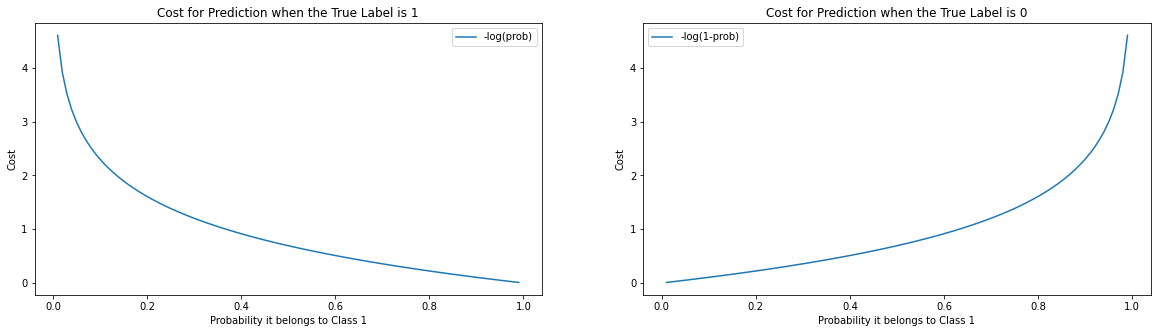

In [145]:
#Run this code to see how the loss function works
plt.close("all")
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
prob = np.linspace(0.01,.99,100)
plt.plot(prob,-np.log(prob),label="-log(prob)")
plt.title("Cost for Prediction when the True Label is 1")
plt.xlabel("Probability it belongs to Class 1")
plt.ylabel("Cost")
plt.legend()
plt.subplot(1,2,2)
prob = np.linspace(0.01,.99,100)
plt.plot(prob,-np.log(1-prob),label="-log(1-prob)")
plt.title("Cost for Prediction when the True Label is 0")
plt.xlabel("Probability it belongs to Class 1")
plt.ylabel("Cost")
plt.legend(loc=2)
plt.show()

In [146]:
def loss_function(y, predicted_y):
    # YOUR CODE HERE
    loss = -1 * ((y * np.log(predicted_y)) + (1-y)*np.log(1-predicted_y))
    return loss
    raise NotImplementedError()

In [147]:
assert loss_function(1, 0.70).round(3) == 0.357
print("Passed test!")

Passed test!


In [148]:
assert loss_function(1, 0.30).round(3) == 1.204
print("Passed test!")

Passed test!


#### Task 4 - Implement the Stochastic gradient descent algorithm  <a id='task4'></a>
See the lecture note and textbook for more clarity.
- lr = learning rate
- other variables are as defined previously
- return the updated weight and bias

- The general algorithm (See comments in the code block to make it clearer)
![lr4.png](lr4.png)

- The formula for the gradient for each weight
![lr5.png](lr5.png)


- The formula for the gradient of the bias
![lr6.png](lr6.png)


- The formula to calculate the updated weight and bias
![lr7.png](lr7.png)

In simpler terms it is:

  `updated_weight = previous_weight - learning_rate * gradient`
  
  `updated_bias = previous_bias - learning_rate * gradient`
  
  

In [149]:
def stochastic_gradient(lr, X, y,w,b):
    
    # YOUR CODE HERE
    # 1a. get predicted_y
    y_predicted = weighted_features(X,w,b)

    # 1b. Compute the loss**(optional)
    loss = loss_function(y[0], y_predicted)

    # 2a. compute the gradient of the weights
    w_gradient = (sigmoid(y_predicted)-y)*X[0]

    # 2b. compute the gradient of the bias
    b_gradient = sigmoid(y_predicted)-y[0]

    # 3a. compute the updated weight (w)
    w = w - lr*w_gradient
    # 3b. compute the updated bias (b)
    b = b - lr*b_gradient

    return w, b
    raise NotImplementedError()
    

In [150]:
X = np.array([[3,2]])
w = np.array([0,0])
b = 0.0
y = [1]
lr = 0.1


In [151]:
assert stochastic_gradient(0.1, X, y,w,b)[0][0].round(2) == 0.15

In [152]:
assert stochastic_gradient(0.1, X, y,w,b)[0][1].round(1) == 0.1

In [153]:
assert stochastic_gradient(0.1, X, y,w,b)[1].round(2) == 0.05

In [154]:
l = np.array([[3.5,2.5,1,3,0,4.19]])
m = np.array([2, -5.0, -1.2, 0.5, -2.0, 0.7])
b = 0.0
y = [1]
assert stochastic_gradient(0.1, l, y,m,b)[0][0].round(2) == 2.32
print("Tests passed!")

Tests passed!


In [155]:
assert stochastic_gradient(0.1, l, y,m,b)[0][1].round(2) == -4.77
print("Tests passed!")

Tests passed!


In [156]:
assert stochastic_gradient(0.1, l, y,m,b)[0][2].round(3) == -1.109
print("Tests passed!")

Tests passed!


In [157]:
assert stochastic_gradient(0.1, l, y,m,b)[0][3].round(3) == 0.772
print("Tests passed!")

Tests passed!


In [158]:
assert stochastic_gradient(0.1, l, y,m,b)[0][4].round(3) == -2.

In [159]:
assert stochastic_gradient(0.1, l, y,m,b)[0][5].round(2) == 1.08

In [160]:
assert stochastic_gradient(0.1, l, y,m,b)[1].round(3) == 0.091

#### Note: All we have done is for a single instance.
`Reference: Extracted from the textbook (Pages 94-95)`

Stochastic gradient descent is called stochastic because it chooses a single random
example at a time, moving the weights so as to improve performance on that single
example. That can result in very choppy movements, so it’s common to compute the
gradient over batches of training instances rather than a single instance. 

For example in batch training we compute the gradient over the entire dataset.
By seeing so many examples, batch training offers a superb estimate of which direction
to move the weights, at the cost of spending a lot of time processing every
single example in the training set to compute this perfect direction.

A compromise is mini-batch training, where training is carried out on a group of examples less than the entire dataset.

When computing the loss over a set of training examples, the `cost function` is used. It is the average loss for each example. The gradient becomes the derivative of the cost function, which is the average of the individual gradients. Vectorization is usually used for efficient computations when dealing with batches.

 See the textbook for formula for the cost function and it's gradient.